In [1]:
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Reading csv files and working with them 
import pandas as pd

#Model building
import sklearn
import tensorflow as tf
#Model deployment
import pickle


## Introduction

#### Customer churn prediction
* Customer churn is when customer stops all business with the company
* It can have a significant impact on the companys revenue and its crutial for the business to fine out why customers are leaving and take steps to reduce the number of customers leavuing...
* One  way is to do this by identifying customer segments that are at eiak of leaving anf implementing retention strtagies to keep them and also using ml algos companies can predict which customers are likely to leave in the future and take actions to keep them before they leave....


## Steps: 

* Import libraries: 
* Load Dataset
* EDA
* Outliers using IQR method

* Feature engineering
    * Cleaning and transforming data.
    * One hot encoding
    * Feature scaling
    * Feature selection
    
* Prediction using different Models
* Looking at the accuracy score 
* Choosing the best model for this 

* Exporting the model (pickle , fastAPI, streamlit)
* Model deployment using heroku or other softwere

*Finally making a ppt for business decisions that needs to be made , abot the problems etc ....

In [2]:
df=pd.read_csv(r'D:\zzz. Projects for cv\1. Customer churn retention\Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### We have two types of data here , Catagorical and numarical data

In [4]:
df.size

147903

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Total charges are given as float datatype but it is an object datatype

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Basic data cleaning

In [10]:
df['TotalCharges'].dtype

dtype('O')

In [11]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df['TotalCharges'].dtype

dtype('float64')

In [13]:
categorical_features=[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'
]
numarical_features=['tenure','MonthlyCharges','TotalCharges']
target='churn'

In [14]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [15]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


## Feature distribution

We plot distributions for numarical and catagorical features dist woth target variables


In [16]:
df[numarical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


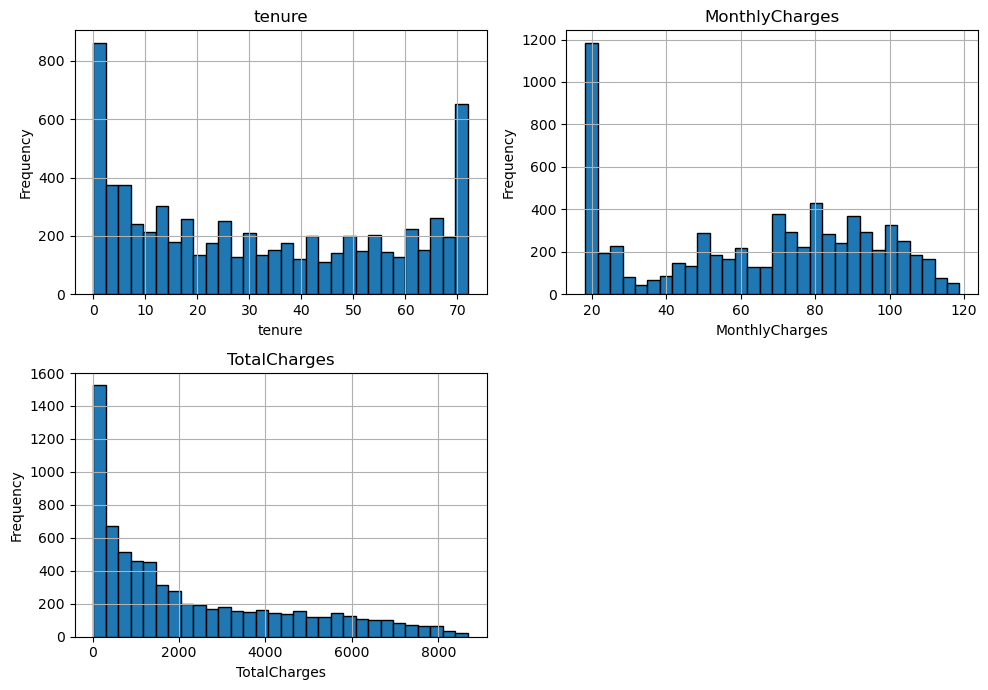

In [22]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'numerical_features' is a list of your numerical columns
axes = df[numarical_features].hist(bins=30, figsize=(10, 7), edgecolor='k')

# Loop over each subplot axis to set the x-axis label
for ax, feature in zip(axes.flatten(), numarical_features):
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")  # Optional: set a y-axis label as well

plt.tight_layout()
plt.show()


array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

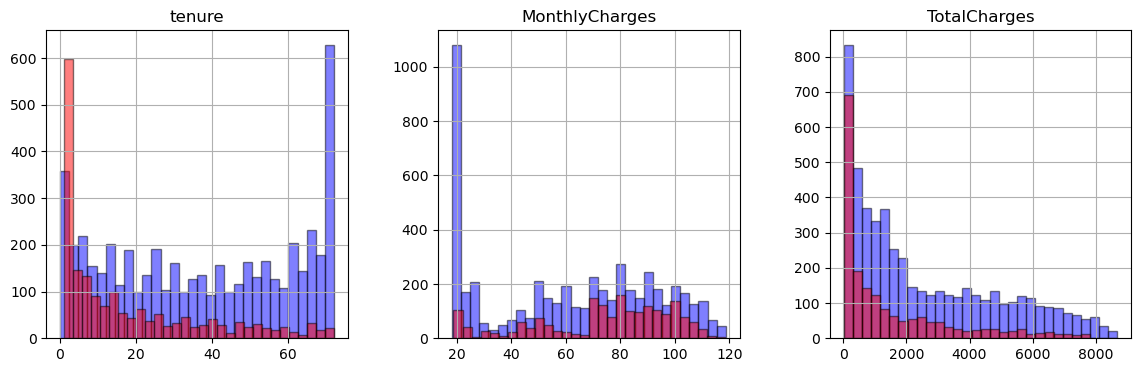

In [24]:
fig,ax= plt.subplots(1,3,figsize=(14,4))
df[df.Churn== "No"][numarical_features].hist(bins=30,color='blue',alpha=0.5,ax=ax,edgecolor="k")
df[df.Churn== "Yes"][numarical_features].hist(bins=30,color='red',alpha=0.5,ax=ax,edgecolor="k")

Catagorical feature distribution

Lets look at catagorical feature distribution:

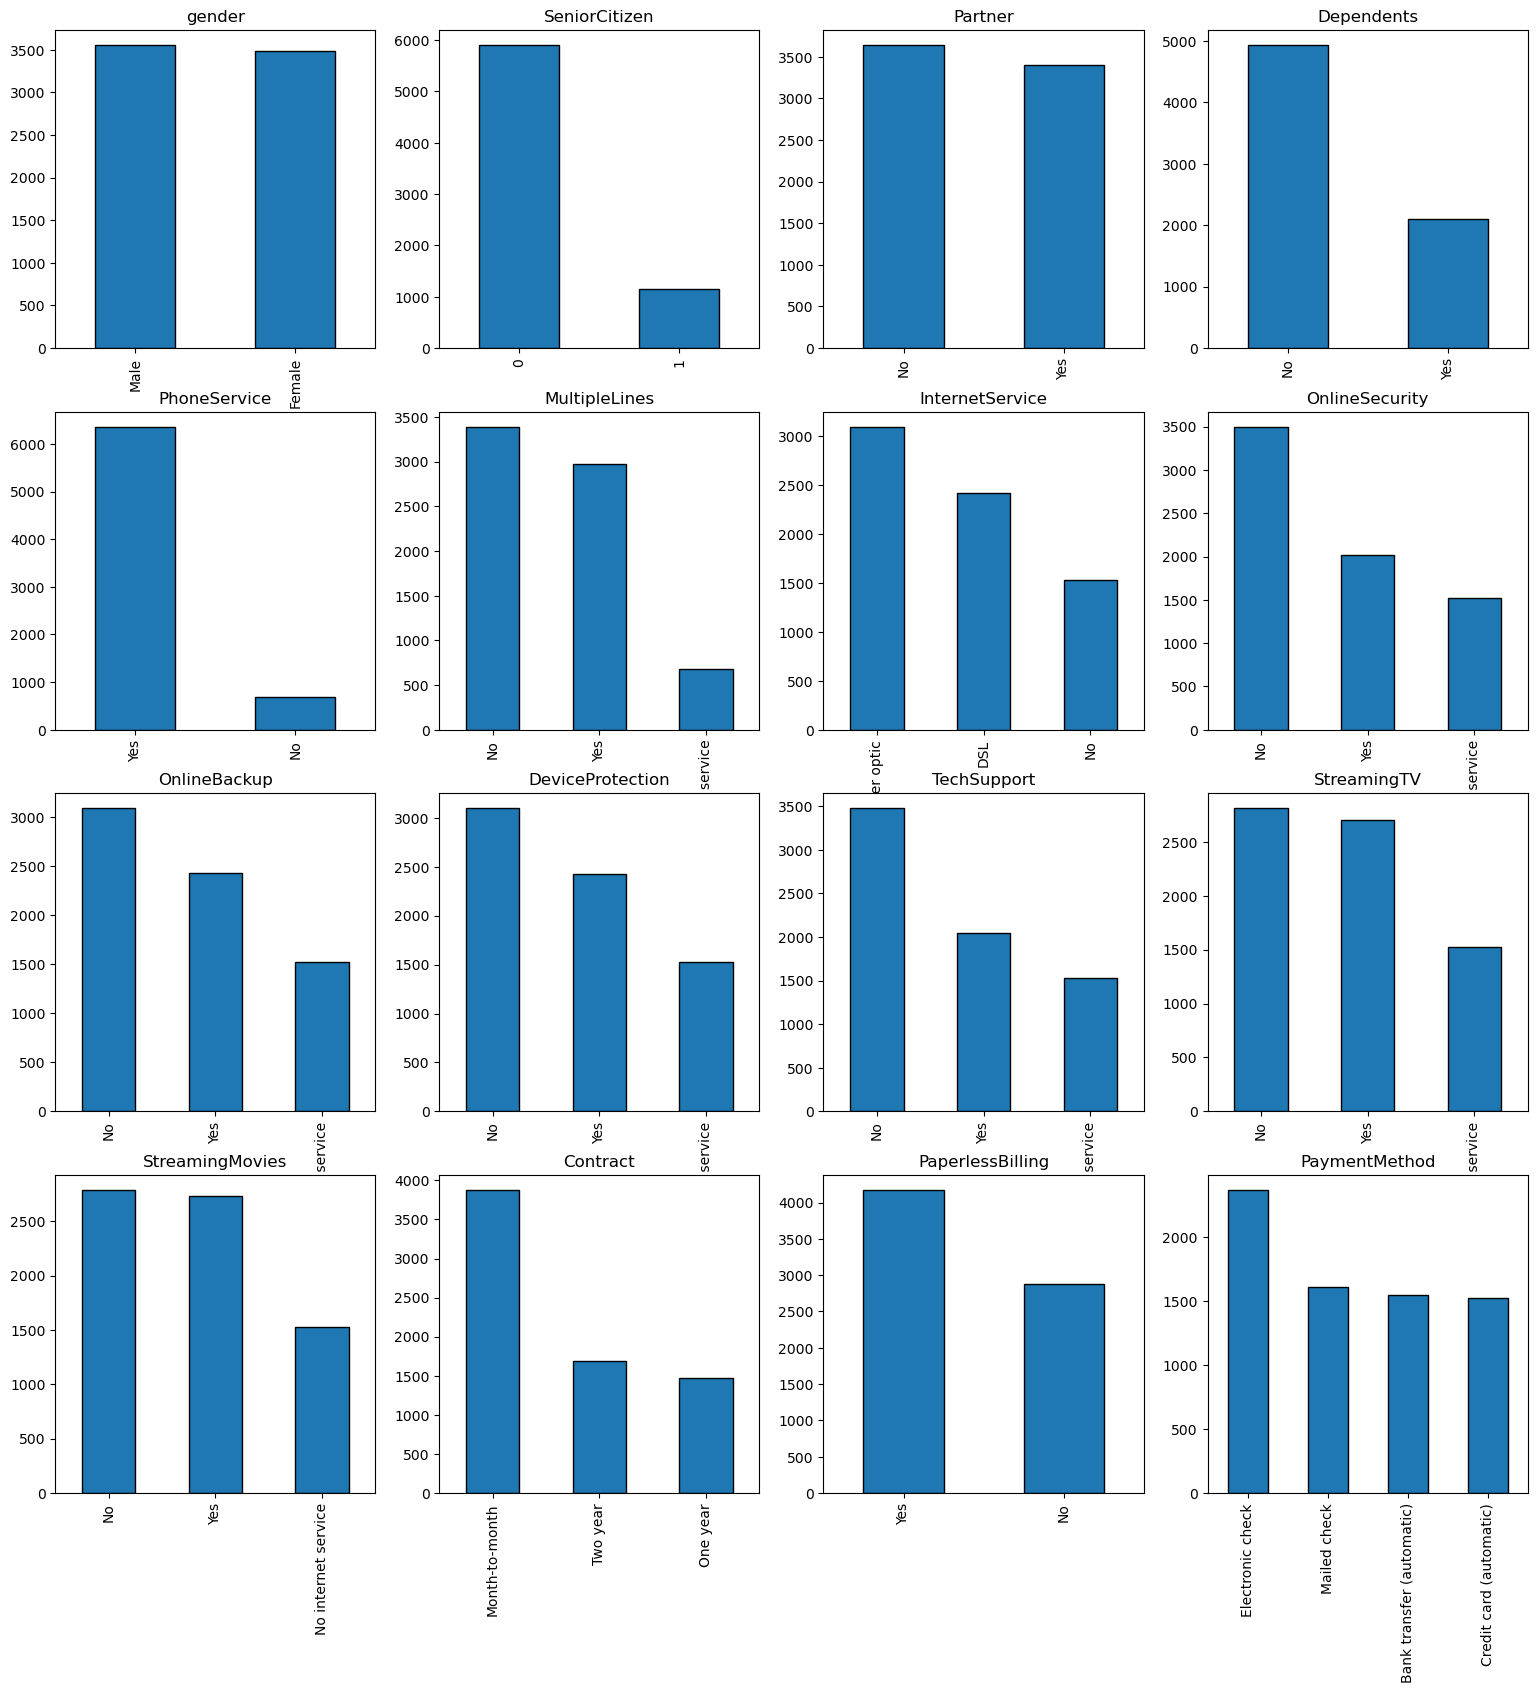

In [25]:
rows,cols=4,4
fig,ax=plt.subplots(rows,cols,figsize=(19,19))
row,col=0,0
for i,categorical_feature in enumerate(categorical_features):
    if col== cols-1:
        row+=1
    col= i%cols
    df[categorical_feature].value_counts().plot(kind='bar',ax=ax[row,col],edgecolor="k").set_title(categorical_feature)

Text(0.5, 1.0, 'Churned')

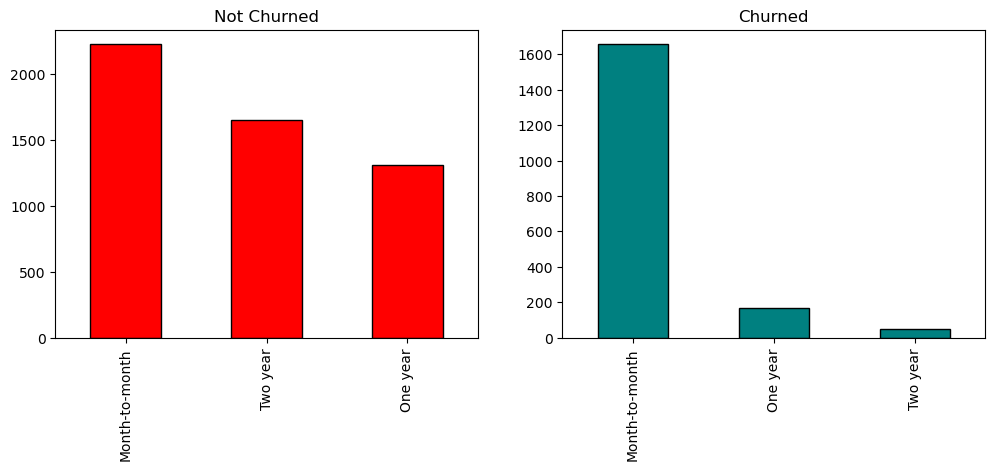

In [26]:
feature='Contract'
fig,ax=plt.subplots(1,2,figsize=(12,4))
df[df.Churn== "No"][feature].value_counts().plot(kind='bar',color='red',ax=ax[0],edgecolor="k").set_title("Not Churned")
df[df.Churn== "Yes"][feature].value_counts().plot(kind='bar',color='teal',ax=ax[1],edgecolor="k").set_title("Churned")

In [27]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


# Cleaning and Transforming Data

In [28]:
df.drop(['customerID'],axis = 1,inplace = True)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# One hot encoding()

In [30]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [31]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [32]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

## Rearranging columns

In [33]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [34]:
df1.shape

(7043, 31)

In [35]:
#Replacing missing values with the mean of the resepctive columns
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

## Feature selection and Train test split

In [38]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [40]:
predLR = logmodel.predict(X_test)

In [41]:
predLR

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:

Y_test

5616    0
2937    0
1355    0
5441    1
3333    0
       ..
2797    1
412     0
174     0
5761    0
5895    0
Name: Churn_Yes, Length: 2113, dtype: uint8

In [43]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



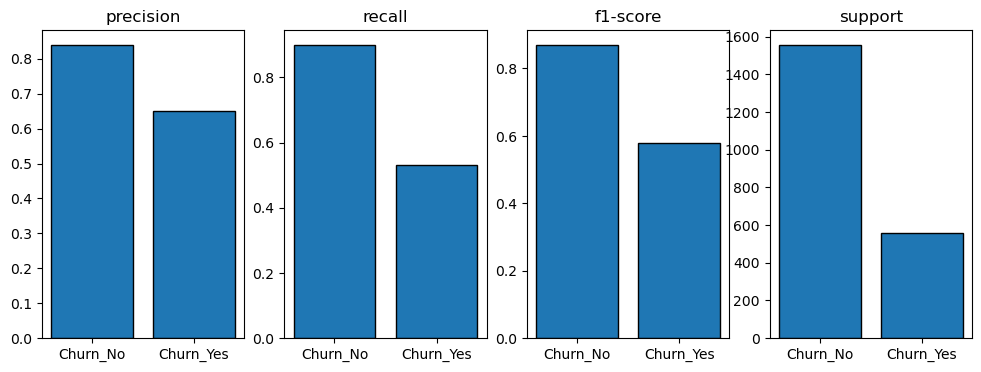

In [44]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()],edgecolor="k")
    ax[i].set_title(metric)

# display the plot
plt.show()

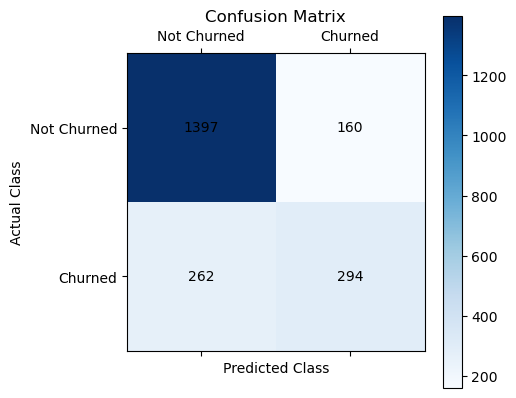

In [54]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)
# create a heatmap of the matrix using matshow()

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Y_test and predLR are your true and predicted labels
cm = confusion_matrix(Y_test, predLR)

# Plotting the confusion matrix with a custom color map
plt.matshow(cm, cmap='Blues')  # Change 'Blues' to any colormap you prefer, e.g., 'viridis', 'coolwarm', 'plasma', etc.
plt.colorbar()  # Add a color bar for reference
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [55]:
logmodel.score(X_train, Y_train)


0.8062880324543611

In [56]:
accuracy_score(Y_test, predLR)

0.8002839564600095

## Prediction using Support Vector Classifie

In [57]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [58]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [59]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

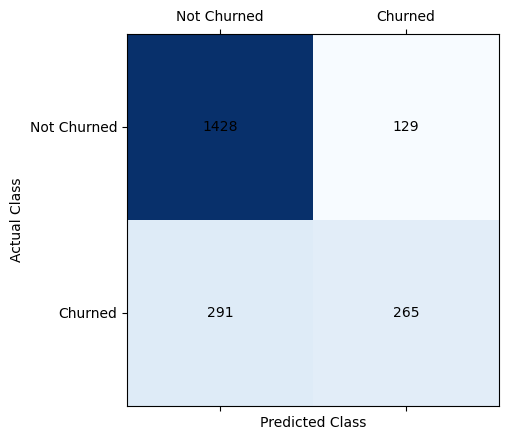

In [60]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc, cmap='Blues')

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')

        
# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [61]:
svc.score(X_train,Y_train)

0.8170385395537525

In [62]:
accuracy_score(Y_test, y_pred_svc)

0.8012304779933743

## Prediction using Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [64]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1557
           1       0.46      0.48      0.47       556

    accuracy                           0.71      2113
   macro avg       0.63      0.64      0.64      2113
weighted avg       0.72      0.71      0.72      2113



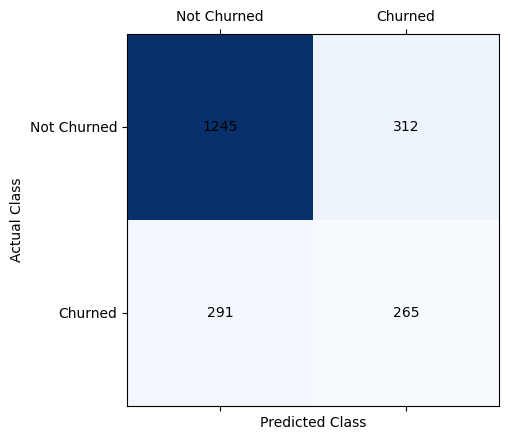

In [65]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc, cmap='Blues')

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [66]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [67]:
accuracy_score(Y_test, y_pred_dtc)

0.7146237576904875

## Prediction using KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [69]:
pred_knn = knn.predict(X_test)

In [70]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

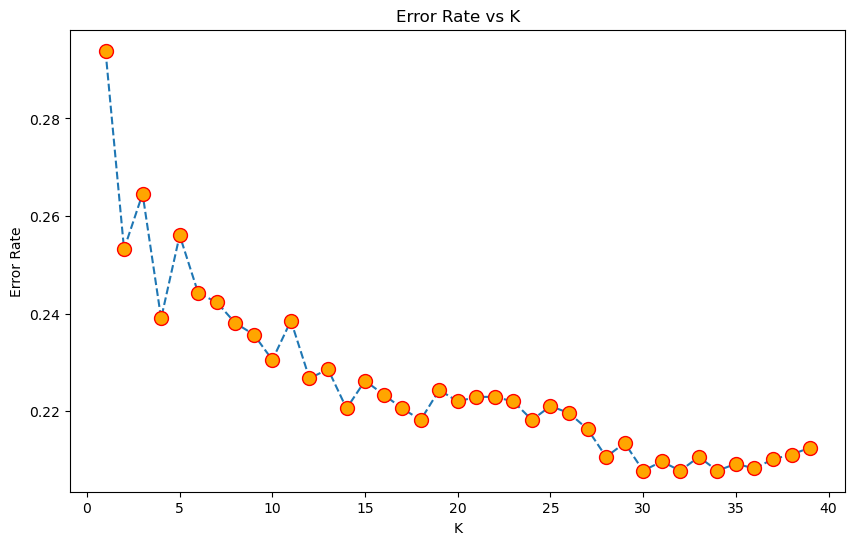

In [74]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,linestyle = '--',marker = 'o',markerfacecolor='orange',markeredgecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [76]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

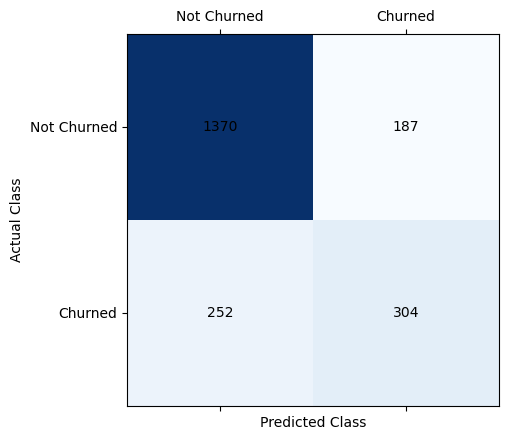

In [77]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn, cmap='Blues')

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [78]:
knn.score(X_train,Y_train)

0.8008113590263691

In [79]:
accuracy_score(Y_test, pred_knn)

0.792238523426408

df=pd.read_csv(r'D:\zzz. Projects for cv\1. Customer churn retention\Telco-Customer-Churn.csv')

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Load data
df=pd.read_csv(r'D:\zzz. Projects for cv\1. Customer churn retention\Telco-Customer-Churn.csv')

# Fix data types for TotalCharges if necessary
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define feature matrix X and target variable y
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Assuming 'Churn' column has 'Yes'/'No' values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC score
    
    results[model_name] = {
        'CV AUC': cv_scores.mean(),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Test Precision': precision_score(y_test, y_pred),
        'Test Recall': recall_score(y_test, y_pred),
        'Test F1-Score': f1_score(y_test, y_pred),
        'Test AUC': roc_auc_score(y_test, y_proba)
    }

# Print results and determine the best model
best_model = None
best_auc = 0
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()
    if metrics['Test AUC'] > best_auc:
        best_auc = metrics['Test AUC']
        best_model = model_name

print(f"The best model is {best_model} with a Test AUC of {best_auc:.4f}")


Model: Logistic Regression
  CV AUC: 0.8407
  Test Accuracy: 0.8211
  Test Precision: 0.6873
  Test Recall: 0.5952
  Test F1-Score: 0.6379
  Test AUC: 0.8620

Model: Decision Tree
  CV AUC: 0.6491
  Test Accuracy: 0.7197
  Test Precision: 0.4704
  Test Recall: 0.4692
  Test F1-Score: 0.4698
  Test AUC: 0.6412

Model: Random Forest
  CV AUC: 0.8222
  Test Accuracy: 0.7913
  Test Precision: 0.6525
  Test Recall: 0.4531
  Test F1-Score: 0.5348
  Test AUC: 0.8391

Model: Gradient Boosting
  CV AUC: 0.8418
  Test Accuracy: 0.8119
  Test Precision: 0.6800
  Test Recall: 0.5469
  Test F1-Score: 0.6062
  Test AUC: 0.8625

Model: XGBoost
  CV AUC: 0.8145
  Test Accuracy: 0.7871
  Test Precision: 0.6213
  Test Recall: 0.5013
  Test F1-Score: 0.5549
  Test AUC: 0.8308

Model: SVM
  CV AUC: 0.7938
  Test Accuracy: 0.8141
  Test Precision: 0.6934
  Test Recall: 0.5335
  Test F1-Score: 0.6030
  Test AUC: 0.8234

Model: KNN
  CV AUC: 0.7706
  Test Accuracy: 0.7708
  Test Precision: 0.5744
  Test Reca

C:\Users\987ta\AppData\Local\Temp\ipykernel_29376\574205155.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


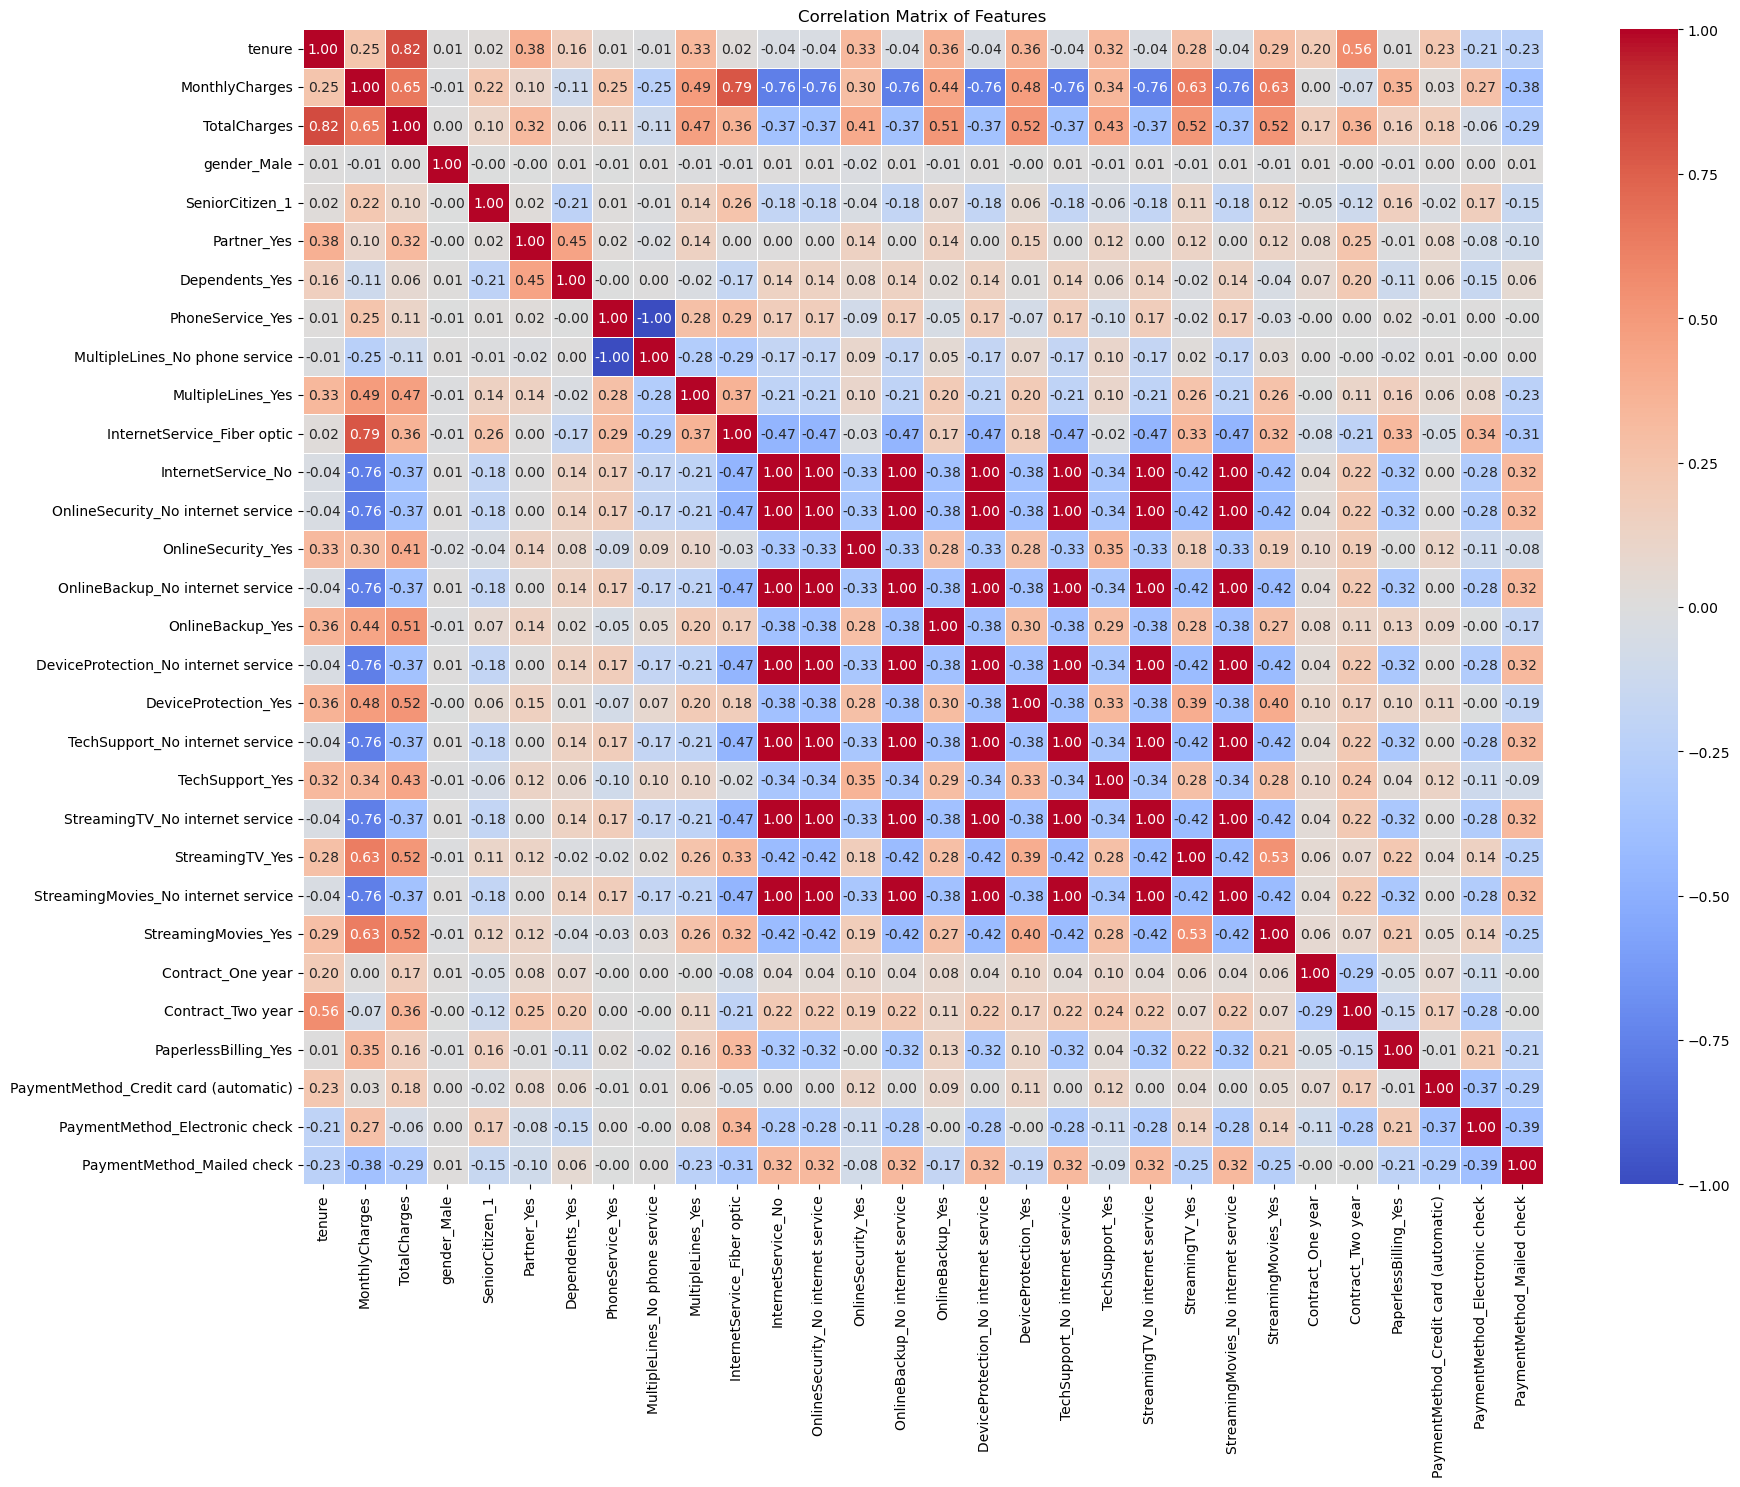

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df=pd.read_csv(r'D:\zzz. Projects for cv\1. Customer churn retention\Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, if necessary
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
